# Importing Libraries 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/Users/snehagupta/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r'/Users/snehagupta/Desktop/Placement - THE GOAL/ML-PROJECTS /HOTELS CANCELLATION PROJECT/hotel_bookings.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(4)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [5]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

## Data Cleaning

In [6]:
df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
df.drop(['agent','company'],axis=1, inplace=True) ## to remove the agent and company column from the data set 

In [9]:
(df['country'].isnull().sum()/ df.shape[0])*100  ## concludes the proportion of the country column in the data set 

0.40874445095904177

In [10]:
df['country'].value_counts() # gives the frequency value in the country column in dec order 

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [11]:
df['country'].value_counts().index[0] # gives the most frequent value 

'PRT'

In [12]:
df['country'].fillna(df['country'].value_counts().index[0],inplace= True)   ## fills all the NaN values in the 'country' column with the most frequent country PRT

In [13]:
df.fillna(0,inplace=True) # change all the NAN values with 0 in complete data

In [14]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [15]:
filter1 = (df['children']==0)& (df['adults']==0)& (df['babies']==0)
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [16]:
data = df[~filter1]

In [17]:
data.shape

(119210, 30)

## EDA

### % of people according to the country who has not canceled their booking 

In [18]:
(data[data['is_canceled']==0]['country'].value_counts()/75011)* 100   

country
PRT    28.526483
GBR    12.888776
FRA    11.289011
ESP     8.509419
DEU     8.088147
         ...    
BHR     0.001333
DJI     0.001333
MLI     0.001333
NPL     0.001333
FRO     0.001333
Name: count, Length: 165, dtype: float64

In [19]:
len(data[data['is_canceled']==0])

75011

In [20]:
country_wise_data = data[data['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_data.columns = ['country','No. of Guests']
country_wise_data

,country,No. of Guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [21]:
#!pip install plotly

In [22]:
#!pip install chart_studio

In [23]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs , init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
import plotly.express as px

In [25]:
map_guest = px.choropleth(country_wise_data, 
                          locations = country_wise_data['country'] , 
                          color = country_wise_data['No. of Guests'], 
                          hover_name = country_wise_data['country'], 
                          title = 'Home country of Guests')

In [26]:
map_guest.show()

### How much do Guest pay for a room per night 

In [27]:
data2 = data[data['is_canceled']==0]

In [28]:
data2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [29]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Text(0.5, 1.0, 'price of rooms per night and per person')

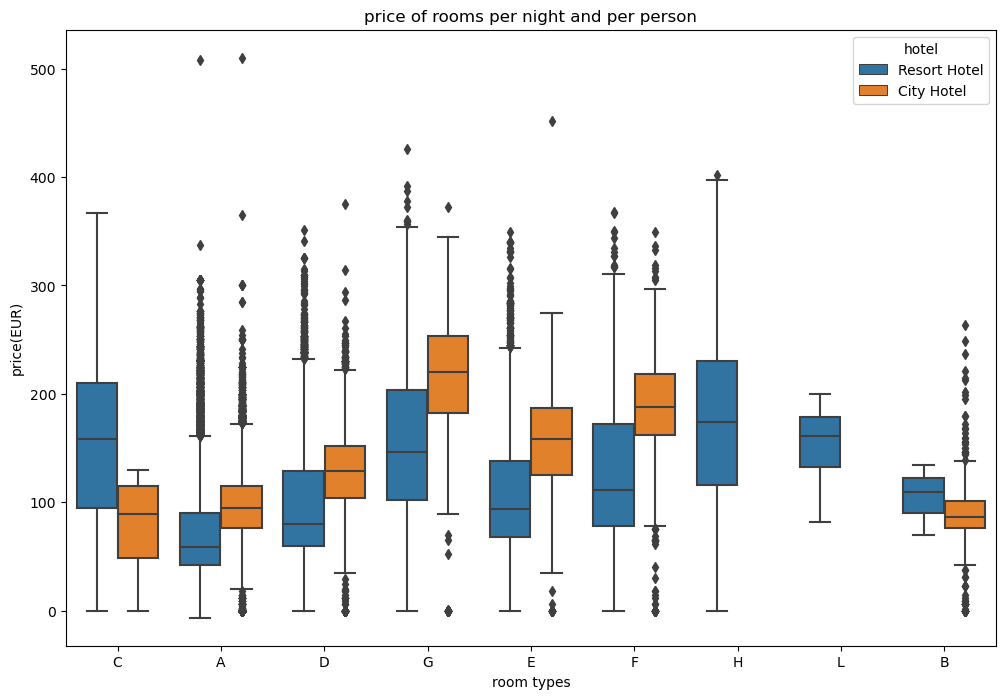

In [30]:
# seaborn boxplot:

plt.figure(figsize= (12,8))
sns.boxplot(x='reserved_room_type' , y = 'adr' , hue = 'hotel' ,data = data2)
plt.xlabel('room types')
plt.ylabel('price(EUR)')
plt.title('price of rooms per night and per person')

In [31]:
# Result :  1) 
#           2)

### ANALYSING DEMAND OF HOTELS

In [32]:
data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [33]:
data_resort = data[(data['hotel']== 'Resort Hotel') & (data['is_canceled']==0)]
data_cityhotel = data[(data['hotel']== 'City Hotel') & (data['is_canceled']==0)]

In [34]:
data_resort.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015


In [35]:
rush_resort = data_resort['arrival_date_month'].value_counts().reset_index()   ##. for resorts 
rush_resort.columns = ['Months', 'No of Guests']
rush_resort

,Months,No of Guests
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [36]:
rush_cityhotel = data_cityhotel['arrival_date_month'].value_counts().reset_index()  ## for city hotels
rush_cityhotel.columns = ['Months', 'No of Guests']
rush_cityhotel

,Months,No of Guests
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [37]:
final_rush = rush_resort.merge(rush_cityhotel,on = 'Months')

In [38]:
final_rush.columns = ['Months','No_of_guests_in_resorts' ,'No_of_guests_in_cityhotel' ]
final_rush

,Months,No_of_guests_in_resorts,No_of_guests_in_cityhotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [39]:
#!pip install sorted-months-weekdays
#!pip install sort_dataframeby_monthorweek

In [40]:
import sort_dataframeby_monthorweek as sd

In [41]:
final_rush = sd.Sort_Dataframeby_Month(final_rush,'Months')

In [42]:
final_rush.columns

Index(['Months', 'No_of_guests_in_resorts', 'No_of_guests_in_cityhotel'], dtype='object')

In [43]:
px.line(data_frame= final_rush, x = 'Months', y = ['No_of_guests_in_resorts' ,'No_of_guests_in_cityhotel'])

### Analyze whether bookings were made only for weekdays or weekends or both

In [44]:
data.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [45]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017


In [46]:
def week_function(row):
    feature1 = 'stays_in_weekend_nights'
    feature2 = 'stays_in_week_nights'
    
    if row[feature2]==0 and row[feature1]>0:
        return 'stay_just_weekend'
    elif row[feature2]>0 and row[feature1]==0:
        return 'stay_just_weekdays'
    elif row[feature1]>0 and row[feature2]>0:
        return 'stay_both_weekend_weekdays'
    else:
        return 'undefined_data'


In [47]:
data2['weekdays_or_weekends']=data2.apply(week_function,axis=1)


In [48]:
data2['weekdays_or_weekends'].value_counts()

weekdays_or_weekends
stay_both_weekend_weekdays    37551
stay_just_weekdays            31788
stay_just_weekend              5050
undefined_data                  622
Name: count, dtype: int64

In [49]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [50]:
group_data=data2.groupby(['arrival_date_month','weekdays_or_weekends']).size()

In [51]:
group_data=data2.groupby(['arrival_date_month','weekdays_or_weekends']).size().unstack().reset_index()

In [52]:
group_data

weekdays_or_weekends,arrival_date_month,stay_both_weekend_weekdays,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,3627,2559,344,30
1,August,4929,3137,509,49
2,December,1901,2123,298,69
3,February,2438,2514,360,47
4,January,1550,2125,393,47
5,July,4570,2818,462,57
6,June,3241,2685,433,36
7,March,3151,3060,359,50
8,May,3442,3017,570,74
9,November,2117,2214,261,59


In [53]:
sorted_data=sd.Sort_Dataframeby_Month(group_data,'arrival_date_month')

In [54]:
sorted_data

,arrival_date_month,stay_both_weekend_weekdays,stay_just_weekdays,stay_just_weekend,undefined_data
0,January,1550,2125,393,47
1,February,2438,2514,360,47
2,March,3151,3060,359,50
3,April,3627,2559,344,30
4,May,3442,3017,570,74
5,June,3241,2685,433,36
6,July,4570,2818,462,57
7,August,4929,3137,509,49
8,September,3192,2692,479,22
9,October,3393,2844,582,82


In [55]:
sorted_data.set_index('arrival_date_month',inplace=True)

<Axes: xlabel='arrival_date_month'>

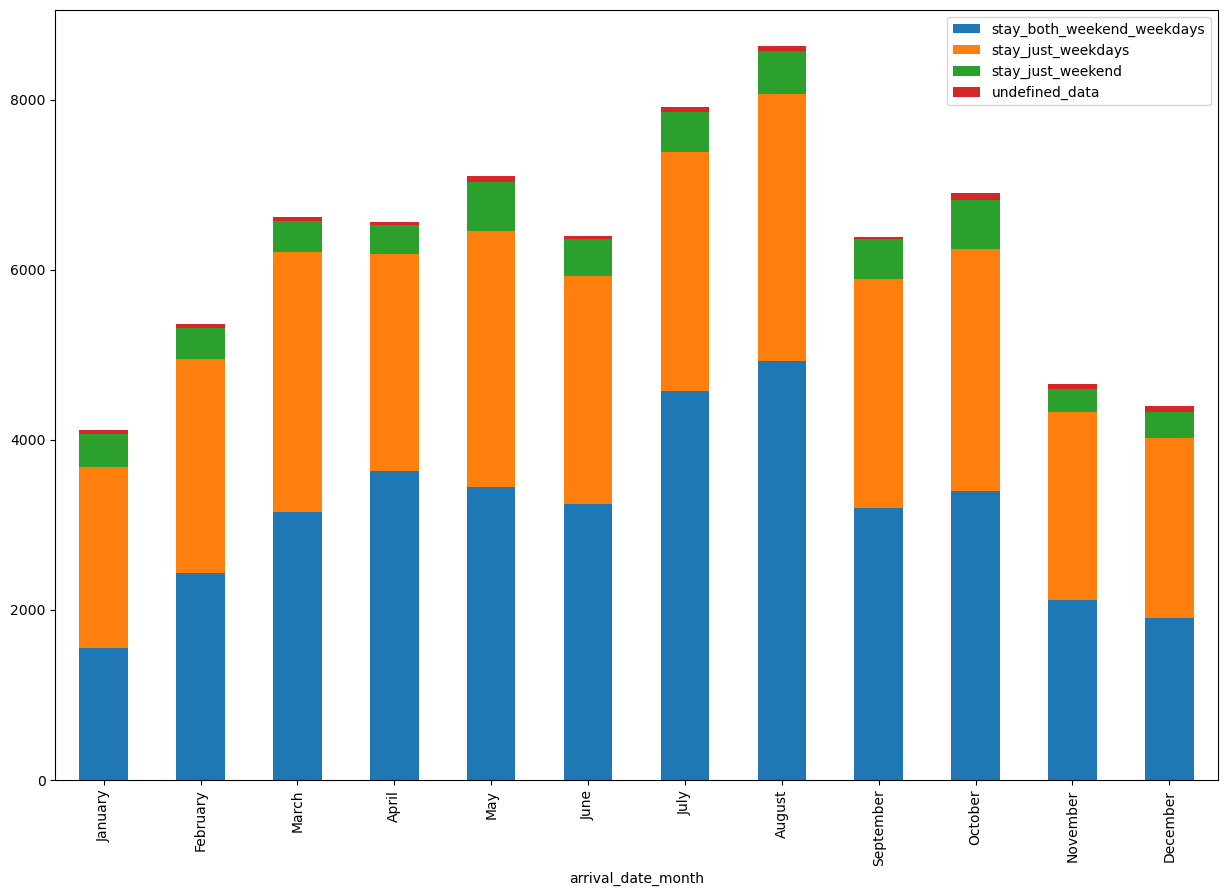

In [56]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

### Creating some useful feature for applying ML model

In [57]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'weekdays_or_weekends'],
      dtype='object')

In [58]:
def family(row):
    if (row['adults']>0) & (row['children']>0 or row['babies']>0):
        return 1 
    else:
        return 0

In [59]:
data['is_family']=data.apply(family,axis=1)

In [60]:
data['total_customer']= data['adults']+data['babies']+data['children']

In [61]:
data['total_nights']=data['stays_in_week_nights']+data['stays_in_weekend_nights']

In [62]:
data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1


In [63]:
data['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [64]:
dict1={'No Deposit':0, 'Non Refund':1, 'Refundable': 0}

In [65]:
data['deposit_given']=data['deposit_type'].map(dict1)

In [66]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [67]:
data.drop(columns=['adults', 'children', 'babies', 'deposit_type'],axis=1,inplace=True)

In [68]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [69]:
data.head(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,342,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,BB,...,Transient,0.0,0,0,Check-Out,7/1/2015,0,2.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,BB,...,Transient,75.0,0,0,Check-Out,7/2/2015,0,1.0,1,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2,0
5,Resort Hotel,0,14,2015,July,27,1,0,2,BB,...,Transient,98.0,0,1,Check-Out,7/3/2015,0,2.0,2,0


###  Applying feature encoding on categorical data

In [70]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [71]:
cate_features = [col for col in data.columns
                    if data[col].dtype == 'object']
                      

In [72]:
num_features = [col for col in data.columns
                    if data[col].dtype != 'object']

In [73]:
cate_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [74]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [75]:
data_cat=data[cate_features]

In [76]:
data.groupby(['hotel'])['is_canceled'].mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [77]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [78]:
data_cat['cancellation']= data['is_canceled']

In [79]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,Transient,Check-Out,7/1/2015,0
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,Transient,Check-Out,7/2/2015,0
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,Transient,Check-Out,7/2/2015,0
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,Transient,Check-Out,7/3/2015,0


In [80]:
cols=data_cat.columns

In [81]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation'],
      dtype='object')

In [82]:
for col in cols:
    dict2= data_cat.groupby([col])['cancellation'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict2)
     

In [83]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0.0,0.800000,0.0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0.0,0.985075,0.0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0.0,0.985075,0.0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0.0,0.522876,0.0


### To Handle Outliers

In [84]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [85]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'customer_type', 'reservation_status', 'reservation_status_date',
       'cancellation', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

<Axes: xlabel='lead_time', ylabel='Density'>

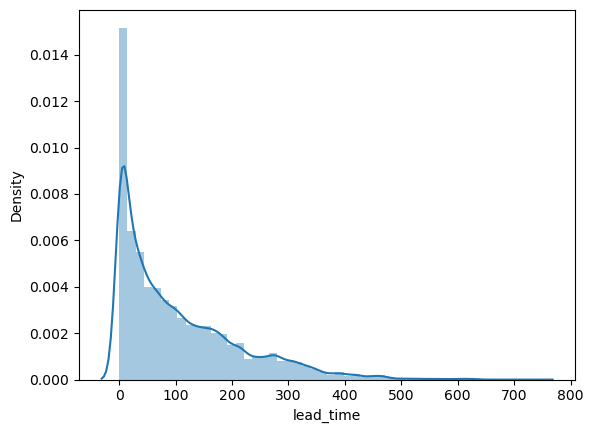

In [86]:
sns.distplot(dataframe['lead_time'])

In [87]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [88]:
handle_outlier('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

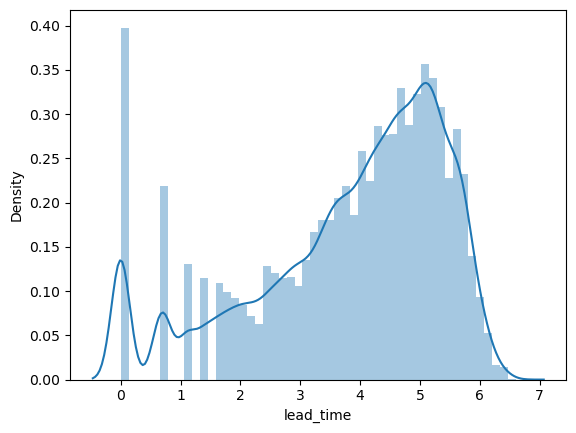

In [89]:
sns.distplot(dataframe['lead_time'])

In [90]:
# For average daily rate (adr)

<Axes: xlabel='adr', ylabel='Density'>

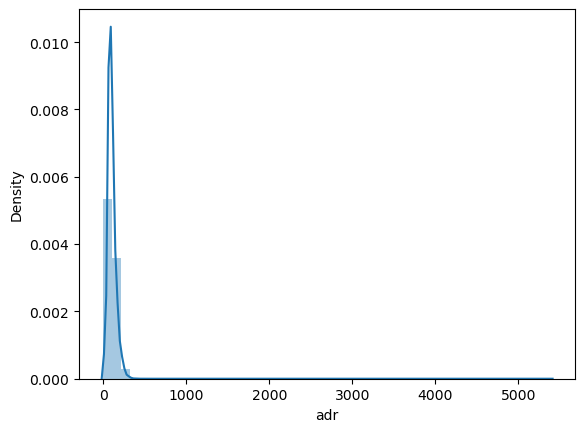

In [91]:
sns.distplot(dataframe['adr'])

In [92]:
dataframe[dataframe['adr']<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14969,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.254504,0.0,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [93]:
handle_outlier('adr')

In [94]:
dataframe['adr'].isnull().sum()

1

In [95]:
### now why this missing value , as we have already deal with the missing values..'
### bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values.

<Axes: xlabel='adr', ylabel='Density'>

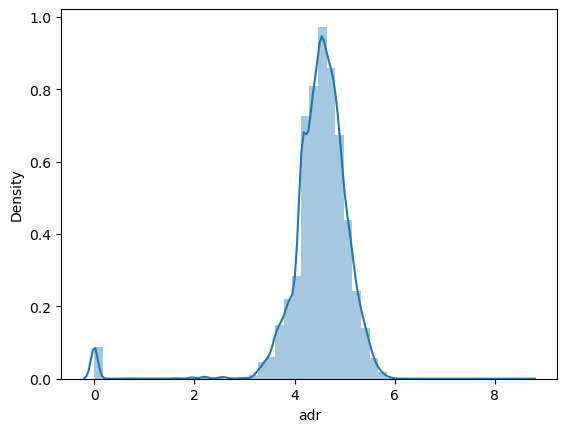

In [96]:
sns.distplot(dataframe['adr'].dropna())

### Selecting important feature using Co-relation and Univarite analysis 

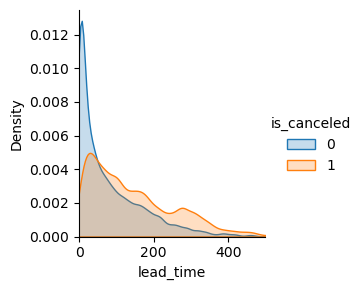

In [97]:
sns.FacetGrid(data,hue='is_canceled', xlim = (0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend() 
# KDE PLOT -- a method for visualizing the distribution of observations in a dataset, analogous to a histogram

In [98]:
corr = dataframe.corr()

In [99]:
corr

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,reservation_status,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
hotel,1.000000,0.051197,0.061782,-0.040609,0.102592,0.182266,0.198171,0.280884,-0.008378,0.137082,...,-0.004467,-0.076598,0.072725,0.154041,-0.218961,-0.043478,-0.058094,-0.038762,-0.249747,0.172415
arrival_date_month,0.051197,1.000000,-0.010208,-0.052405,0.047902,0.077075,-0.038801,0.015456,-0.029636,0.069886,...,-0.021971,-0.011049,0.029164,0.228179,-0.021910,0.002763,0.020491,0.079090,0.045648,0.057361
meal,0.061782,-0.010208,1.000000,0.022476,-0.026007,-0.025486,0.010035,0.013913,0.105767,0.050584,...,0.011109,-0.027189,-0.031562,-0.019908,0.003455,0.006875,0.001466,-0.003447,-0.055689,0.047597
country,-0.040609,-0.052405,0.022476,1.000000,0.078982,-0.129774,0.153177,0.125415,-0.029320,0.357232,...,0.091795,-0.061513,0.067054,-0.160520,0.007613,-0.200822,-0.044139,-0.117351,-0.160759,0.395685
market_segment,0.102592,0.047902,-0.026007,0.078982,1.000000,0.540116,0.182813,0.209272,-0.265606,0.267006,...,-0.117519,-0.057578,0.096385,-0.004009,-0.145726,-0.155463,-0.104584,-0.023874,-0.004546,0.397229
distribution_channel,0.182266,0.077075,-0.025486,-0.129774,0.540116,1.000000,0.070381,0.118970,-0.023234,0.177167,...,-0.142650,-0.118461,0.048001,0.126516,-0.146562,0.075047,-0.026278,0.087776,0.084999,0.115160
reserved_room_type,0.198171,-0.038801,0.010035,0.153177,0.182813,0.070381,1.000000,0.722724,-0.143390,0.072769,...,0.022533,-0.040134,0.068336,-0.185932,-0.093401,-0.161406,-0.133748,-0.246347,-0.188866,0.201923
assigned_room_type,0.280884,0.015456,0.013913,0.125415,0.209272,0.118970,0.722724,1.000000,-0.084025,0.201570,...,-0.003205,-0.096277,0.067129,-0.038347,-0.131035,-0.135337,-0.179356,-0.229081,-0.103571,0.263383
customer_type,-0.008378,-0.029636,0.105767,-0.029320,-0.265606,-0.023234,-0.143390,-0.084025,1.000000,0.136617,...,0.024716,-0.095486,-0.101833,0.117592,0.061786,0.137114,0.106618,0.124318,0.037720,0.121789
reservation_status,0.137082,0.069886,0.050584,0.357232,0.267006,0.177167,0.072769,0.201570,0.136617,1.000000,...,-0.057365,-0.144832,0.054301,0.081660,-0.195701,-0.234877,-0.013226,0.044826,0.018554,0.481507


In [100]:
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
cancellation                      1.000000
reservation_status                1.000000
reservation_status_date           0.488307
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
stays_in_we

In [101]:
corr['is_canceled'].sort_values(ascending=False).index

Index(['is_canceled', 'cancellation', 'reservation_status',
       'reservation_status_date', 'deposit_given', 'country', 'lead_time',
       'market_segment', 'assigned_room_type', 'distribution_channel', 'hotel',
       'customer_type', 'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'days_in_waiting_list', 'meal', 'total_customer',
       'stays_in_week_nights', 'total_nights', 'arrival_date_year',
       'arrival_date_week_number', 'stays_in_weekend_nights',
       'arrival_date_day_of_month', 'is_family',
       'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [102]:
#. HIGH CORELATION - shows overfitting 
#  LOW CORELATION - shows low accuracy in ML model

In [103]:
## Now we drop the features which have high corelation and a very low corelation 

In [104]:
features_to_drop = ['reservation_status','cancellation','arrival_date_year','arrival_date_week_number',
                    'stays_in_weekend_nights','arrival_date_day_of_month','reservation_status_date']

In [105]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [106]:
dataframe.shape

(119210, 24)

### Applying tecniques for of Feature importance

In [107]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given                     0
dtype: int64

In [108]:
dataframe.dropna(inplace=True)

In [109]:
dataframe

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,customer_type,is_canceled,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,...,0,3,0,0.000000,0,0,0,2.0,0,0
1,0.277674,0.374644,0.374106,0.562958,0.153712,0.174868,0.330827,0.188186,0.407864,0,...,0,4,0,0.000000,0,0,0,2.0,0,0
2,0.277674,0.374644,0.374106,0.202310,0.153712,0.174868,0.391567,0.188186,0.407864,0,...,0,0,0,4.330733,0,0,0,1.0,1,0
3,0.277674,0.374644,0.374106,0.202310,0.187618,0.220568,0.391567,0.445055,0.407864,0,...,0,0,0,4.330733,0,0,0,1.0,1,0
4,0.277674,0.374644,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,4.595120,0,1,0,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.417859,0.377823,0.374106,0.202391,0.343313,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,4.576153,0,0,0,2.0,7,0
119386,0.417859,0.377823,0.374106,0.185848,0.367590,0.410598,0.292683,0.251603,0.407864,0,...,0,0,0,5.422436,0,2,0,3.0,7,0
119387,0.417859,0.377823,0.374106,0.167193,0.367590,0.410598,0.318108,0.251373,0.407864,0,...,0,0,0,5.067079,0,4,0,2.0,7,0
119388,0.417859,0.377823,0.374106,0.202310,0.367590,0.410598,0.391567,0.445055,0.407864,0,...,0,0,0,4.657763,0,0,0,2.0,7,0


In [110]:
## separate dependent & independent features

In [111]:
x = dataframe.drop('is_canceled', axis= 1)

In [112]:
y = dataframe['is_canceled']

In [113]:
from sklearn.linear_model import Lasso                   
from sklearn.feature_selection import SelectFromModel


In [114]:
########. WHY LASSO   #################

In [115]:
## Least Absolute Shrinkage and Selection Operator
## can shrink some coefficients to exactly zero.
## This property helps automatically select the most relevant features by effectively discarding irrelevant ones.
## By reducing the number of features, it mitigates the risk of overfitting and improves the model's 
## generalizability on unseen data.
## The bigger the alpha the less features that will be selected.



In [116]:
# Lasso(alpha=0.005)

In [117]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))

In [118]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [119]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [120]:
 cols = x.columns

In [121]:
# print the number of selected features

selected_feature = cols[feature_sel_model.get_support()]

In [122]:
selected_feature

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [123]:
x=x[selected_feature]

In [124]:
x

,country,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_customer,total_nights,deposit_given
0,0.562958,5.837730,0,0,3,0,0.000000,0,0,2.0,0,0
1,0.562958,6.603944,0,0,4,0,0.000000,0,0,2.0,0,0
2,0.202310,2.079442,0,0,0,0,4.330733,0,0,1.0,1,0
3,0.202310,2.639057,0,0,0,0,4.330733,0,0,1.0,1,0
4,0.202310,2.708050,0,0,0,0,4.595120,0,1,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0.202391,3.178054,0,0,0,0,4.576153,0,0,2.0,7,0
119386,0.185848,4.634729,0,0,0,0,5.422436,0,2,3.0,7,0
119387,0.167193,3.555348,0,0,0,0,5.067079,0,4,2.0,7,0
119388,0.202310,4.700480,0,0,0,0,4.657763,0,0,2.0,7,0


In [125]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119209, dtype: int64

In [126]:
np.sum(y ==1)

44199

### APPLYING LOGISTIC REGRESSION 

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [129]:
x_train.shape

(89406, 12)

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logreg = LogisticRegression()

In [132]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [133]:
pred=logreg.predict(x_test)

In [134]:
pred

array([0, 0, 1, ..., 1, 1, 0])

In [135]:
# Accuracy: (TP + TN) / (TP + TN + FP + FN)
# Precision: TP / (TP + FP)
# Recall (Sensitivity): TP / (TP + FN)
# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
conf_mat = confusion_matrix(y_test,pred)

In [138]:
conf_mat

array([[17389,  1377],
       [ 4682,  6355]])

In [139]:
accurecy = (conf_mat[0][0] + conf_mat[1][1]) /conf_mat.sum()

In [140]:
accurecy 

0.7966983189611784

In [141]:
Precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0])

In [142]:
Precision 

0.7878664310633864


### Cross Validation 

In [143]:
from sklearn.model_selection import cross_val_score

In [144]:
score = cross_val_score(logreg,x,y,cv=10)

In [145]:
score.mean()

0.7876092546343968

### Applying multiple algorithms of ML:

In [146]:
# At the time of overfitting we do pre- pruning  and post pruning 

In [147]:
from sklearn.naive_bayes  import GaussianNB
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree  import DecisionTreeClassifier


In [150]:
models= []
models.append((" Logistic Regression ",LogisticRegression()))
models.append(("Naive Bays ",GaussianNB()))
models.append(("Random Forest ",RandomForestClassifier()))
models.append((" Decision Tree",DecisionTreeClassifier()))
models.append(("KNN ",KNeighborsClassifier()))

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

for name, model in models:
    print(f"Model: {name}")
    
    # Fit the model
    model.fit(x_train, y_train)
    
    # Make predictions
    predictions = model.predict(x_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    print("Confusion Matrix:")
    print(cm)
    
    # Accuracy
    acc = accuracy_score(y_test, predictions)
    print(f"Accuracy: {acc:.2f}")
    
    # Precision
    precision = precision_score(y_test, predictions)
    print(f"Precision: {precision:.2f}")
    
    # Recall
    recall = recall_score(y_test, predictions)
    print(f"Recall: {recall:.2f}")
    
    # F1-Score
    f1 = f1_score(y_test, predictions)
    print(f"F1-Score: {f1:.2f}")
    
    print("\n")



Model:  Logistic Regression 
Confusion Matrix:
[[17389  1377]
 [ 4682  6355]]
Accuracy: 0.80
Precision: 0.82
Recall: 0.58
F1-Score: 0.68


Model: Naive Bays 
Confusion Matrix:
[[ 6536 12230]
 [  601 10436]]
Accuracy: 0.57
Precision: 0.46
Recall: 0.95
F1-Score: 0.62


Model: Random Forest 
Confusion Matrix:
[[17216  1550]
 [ 2735  8302]]
Accuracy: 0.86
Precision: 0.84
Recall: 0.75
F1-Score: 0.79


Model:  Decision Tree
Confusion Matrix:
[[15965  2801]
 [ 2639  8398]]
Accuracy: 0.82
Precision: 0.75
Recall: 0.76
F1-Score: 0.76


Model: KNN 
Confusion Matrix:
[[16675  2091]
 [ 3342  7695]]
Accuracy: 0.82
Precision: 0.79
Recall: 0.70
F1-Score: 0.74


